In [1]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nbconvert
from scipy.stats import ttest_ind,ttest_rel
from scipy.stats import ttest_ind,ttest_rel
#import researchpy as rp
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_csv =  sorted(str(p) for p in pathlib.Path("C:/Users/Oleg/Desktop/Paris_Saclay/These/4_DATA/data_exp_1/0_data_raw").glob("*.csv"))
print(len(data_csv))
# data_csv = data_csv[0]
#data_csv

28


##  Data initial  + stat

In [3]:
import csv
def detect_delimiter(csv_file):
    with open(csv_file, 'r') as file:
        dialect = csv.Sniffer().sniff(file.readline())
    return dialect.delimiter
def calcul_stat (data_csv):
    data_list = []
    for elem in data_csv:
        delimiter = detect_delimiter(elem)
        
        df = pd.read_csv(elem, header=0, sep=delimiter)
        df_new  = df.drop(columns=['fix_start_time','dot_mvt_start_time','last_dot_time',
                                  'button_pressed_time','line_cross_time','rest_time','end_time','start_exp_time',
                                  'time_from_start [ces]','early_response (t/f)'])
        prop_left = []
        for elem in df_new['response']:
            if elem  == 1: # right
                prop_left.append(0)  # if right == true 0
            else: # -1 left
                prop_left.append(1) # if right
        df_new.loc[:, "prop_left"] = prop_left
        data_list.append(df_new)
    return data_list

In [4]:
data_list = calcul_stat (data_csv)
data_list[-2]

,trial,index_traj,path,mean_side,mean_val,sd,last_visibl_side,f_missing_pos,last_visibl_center_dist[deg],response,RT,prop_left
0,0,56,iid,left,-0.974,2.955,right,9,5.179,1,399,0
1,1,37,iid,left,-1.988,5.494,left,30,-5.674,-1,592,1
2,2,67,iid,left,-1.011,3.712,right,14,2.576,1,558,0
3,3,79,iid,left,-2.149,4.637,right,22,6.019,1,700,0
4,4,80,iid,left,-1.134,4.973,right,25,3.726,1,664,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,58,iid,left,-2.027,2.567,right,7,4.044,-1,562,1
396,396,21,iid,left,-2.081,4.839,left,24,-11.931,-1,302,1
397,397,49,iid,left,-1.820,6.317,left,40,-5.053,1,509,0
398,398,64,iid,left,-1.583,3.228,right,10,4.674,-1,398,1


In [8]:
def make_data_list (data_list):
    for k in range(len(data_list)) :
        exept_prop_left_lv = [] # expected_prop_left (rdw as last visible point)
        exept_prop_left_ms = [] # expected_prop_left (rdw as mean side)

        acc_lv = []
        acc_ms  = []
        condition = []
        conditions = []
        same_side_as_lv = [] # 
        same_side_as_ms = []
        
        for i in range(data_list[k].shape[0]):
                if data_list[k]['last_visibl_side'][i] == 'left' and data_list[k]['prop_left'][i] == 1:
                    same_side_as_lv.append(1)
                if data_list[k]['last_visibl_side'][i] == 'left' and data_list[k]['prop_left'][i] == 0:
                    same_side_as_lv.append(0)
                if data_list[k]['last_visibl_side'][i] == 'right' and data_list[k]['prop_left'][i] == 0:
                    same_side_as_lv.append(1)
                if data_list[k]['last_visibl_side'][i] == 'right' and data_list[k]['prop_left'][i] == 1:
                    same_side_as_lv.append(0)

                if data_list[k]['mean_side'][i] == 'left' and data_list[k]['prop_left'][i] == 1:
                    same_side_as_ms.append(1)
                if data_list[k]['mean_side'][i] == 'left' and data_list[k]['prop_left'][i] == 0:
                    same_side_as_ms.append(0)
                if data_list[k]['mean_side'][i] == 'right' and data_list[k]['prop_left'][i] == 0:
                    same_side_as_ms.append(1)
                if data_list[k]['mean_side'][i] == 'right' and data_list[k]['prop_left'][i] == 1:
                    same_side_as_ms.append(0)
    
    
                if data_list[k]['mean_side'][i] =='left' and data_list[k]['last_visibl_side'][i] == 'left':
                    conditions.append('LL')
                if data_list[k]['mean_side'][i] =='left' and data_list[k]['last_visibl_side'][i] == 'right':
                    conditions.append('LR')
                if data_list[k]['mean_side'][i] =='right' and data_list[k]['last_visibl_side'][i] == 'left':
                    conditions.append('RL')
                if data_list[k]['mean_side'][i] =='right' and data_list[k]['last_visibl_side'][i] == 'right':
                    conditions.append('RR')
                    
                if data_list[k]['mean_side'][i] =='left' and data_list[k]['last_visibl_side'][i] == 'left':
                    condition.append('same')
                if data_list[k]['mean_side'][i] =='left' and data_list[k]['last_visibl_side'][i] == 'right':
                    condition.append('different')
                if data_list[k]['mean_side'][i] =='right' and data_list[k]['last_visibl_side'][i] == 'left':
                    condition.append('different')
                if data_list[k]['mean_side'][i] =='right' and data_list[k]['last_visibl_side'][i] == 'right':
                    condition.append('same')
                # expected_prop_left (rdw as last visible point)
                if data_list[k]['path'][i] =='rdw' and data_list[k]['last_visibl_side'][i] == 'left':
                    exept = 1
                    exept_prop_left_lv.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_lv.append(1)  
                    else :  
                        acc_lv.append(0)

                elif data_list[k]['path'][i] =='rdw' and data_list[k]['last_visibl_side'][i] == 'right':
                    exept = 0
                    exept_prop_left_lv.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_lv.append(1)  
                    else :  
                        acc_lv.append(0)

                elif data_list[k]['path'][i] =='iid' and data_list[k]['mean_side'][i] == 'left':
                    exept = 1
                    exept_prop_left_lv.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_lv.append(1)  
                    else :  
                        acc_lv.append(0)
                elif data_list[k]['path'][i] =='iid' and data_list[k]['mean_side'][i] == 'right':
                    exept = 0
                    exept_prop_left_lv.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_lv.append(1)  
                    else :  
                        acc_lv.append(0)
               # expected_prop_left (rdw as mean side)     
                if data_list[k]['path'][i] =='rdw' and data_list[k]['mean_side'][i] == 'left':
                    exept = 1
                    exept_prop_left_ms.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_ms.append(1)  
                    else :  
                        acc_ms.append(0)           
                elif data_list[k]['path'][i] =='rdw' and data_list[k]['mean_side'][i] == 'right':
                    exept = 0
                    exept_prop_left_ms.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_ms.append(1)  
                    else :  
                        acc_ms.append(0) 
                elif data_list[k]['path'][i] =='iid' and data_list[k]['mean_side'][i] == 'left':
                    exept = 1
                    exept_prop_left_ms.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_ms.append(1)  
                    else :  
                        acc_ms.append(0) 
                elif data_list[k]['path'][i] =='iid' and data_list[k]['mean_side'][i] == 'right':
                    exept = 0
                    exept_prop_left_ms.append(exept)
                    if data_list[k]['prop_left'][i] == exept:
                        acc_ms.append(1)  
                    else :  
                        acc_ms.append(0) 
        data_list[k]['RT_s'] = data_list[k]['RT']/1000 # add colums RT in ms   
        data_list[k].drop(columns=['trial','RT'],inplace=True)

    #     data_clean_list[k].drop(columns=['trial','mean_val','sd','last_visibl_center_dist[deg]','f_missing_pos','RT'],inplace=True)    

        data_list[k].insert(0, "# subj", np.ones(len(data_list[k]), dtype=int)*int(k), True)
        data_list[k].insert(3, "conditions", conditions, True)
        data_list[k].insert(4, "condition", condition, True)

#         data_list[k]["exept_prop_left_lv"] = exept_prop_left_lv
        data_list[k]["acc_lv"] = acc_lv
        data_list[k]["same_side_as_lv"] = same_side_as_lv
        data_list[k]["same_side_as_ms"] = same_side_as_ms
    
#         data_list[k]["exept_prop_left_ms"] = exept_prop_left_ms
#         data_list[k]["acc_ms"] = acc_ms  
        cond_sum = []
        for i in range(data_list[k].shape[0]):
                if data_list[k]['path'][i] =='iid' and data_list[k]['condition'][i] == 'same':
                    cond_sum.append('iid_same')
                if data_list[k]['path'][i] =='iid' and data_list[k]['condition'][i] == 'different':
                    cond_sum.append('iid_different')


                if data_list[k]['path'][i] =='rdw' and data_list[k]['condition'][i] == 'same':
                    cond_sum.append('rdw_same')
                if data_list[k]['path'][i] =='rdw' and data_list[k]['condition'][i] == 'different':
                    cond_sum.append('rdw_different')

        data_list[k].insert(5, "cond_sum", cond_sum, True)
    return data_list

In [14]:
## work
import numpy as np
import pandas as pd

def remove_anomaly_3std_log(data_list):
    data_clean_list = []
    total_data_points = 0
    total_anomalies = 0
    
    for elem in data_list:
        df = elem.copy()  
        total_data_points += len(df)

        df['log_RT_s'] = np.log(df['RT_s'])

        mean_log_rt = df['log_RT_s'].mean()
        std_log_rt = df['log_RT_s'].std()

        upper_bound = mean_log_rt + 3 * std_log_rt
        conditions = df['log_RT_s'] > upper_bound
        
        num_anomalies = conditions.sum()
        total_anomalies += num_anomalies
    

        df_clean = df[~conditions].drop(columns=['log_RT_s'])
        data_clean_list.append(df_clean)

    percentage_anomalies = (total_anomalies / total_data_points) * 100
    
    print(f"Total anomalies detected and removed: {total_anomalies}")
    print(f"Total data points before removal: {total_data_points}")
    print(f"Total data points after removal: {total_data_points - total_anomalies}")
    print(f"Percentage of anomalies: {percentage_anomalies:.2f}%")
    
    return data_clean_list


In [17]:
import numpy as np
import pandas as pd

def replace_anomalies_with_nan_3std_log(data_list):
    data_clean_list = []
    total_data_points = 0
    total_anomalies = 0
    
    for elem in data_list:
        df = elem.copy()  
        total_data_points += len(df)

        # Apply logarithmic transformation to RT
        df['log_RT_s'] = np.log(df['RT_s'])

        # Calculate mean and standard deviation of the log-transformed RTs
        mean_log_rt = df['log_RT_s'].mean()
        std_log_rt = df['log_RT_s'].std()

        # Define upper bound for anomaly detection (3 standard deviations)
        upper_bound = mean_log_rt + 3 * std_log_rt

        # Identify anomalies (where RT exceeds the upper bound)
        conditions = df['log_RT_s'] > upper_bound

        # Count the number of anomalies
        num_anomalies = conditions.sum()
        total_anomalies += num_anomalies

        # Replace anomalies with NaN in the original RT column
        df.loc[conditions, 'RT_s'] = np.nan

        # Drop the log-transformed column as it is no longer needed
        df_clean = df.drop(columns=['log_RT_s'])
        
        # Append the cleaned dataframe to the list
        data_clean_list.append(df_clean)

    # Calculate the percentage of anomalies
    percentage_anomalies = (total_anomalies / total_data_points) * 100
    
    # Print statistics about anomalies
    print(f"Total anomalies detected and replaced with NaN: {total_anomalies}")
    print(f"Total data points before: {total_data_points}")
    print(f"Total data points after: {total_data_points}")
    print(f"Percentage of anomalies: {percentage_anomalies:.2f}%")
    
    return data_clean_list


In [18]:
data_clean_list  = replace_anomalies_with_nan_3std_log(data_list)

Total anomalies detected and replaced with NaN: 76
Total data points before: 11200
Total data points after: 11200
Percentage of anomalies: 0.68%


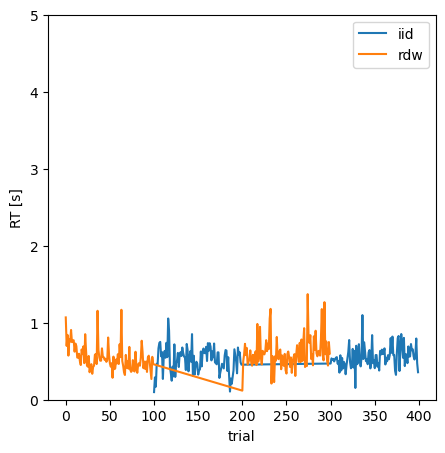

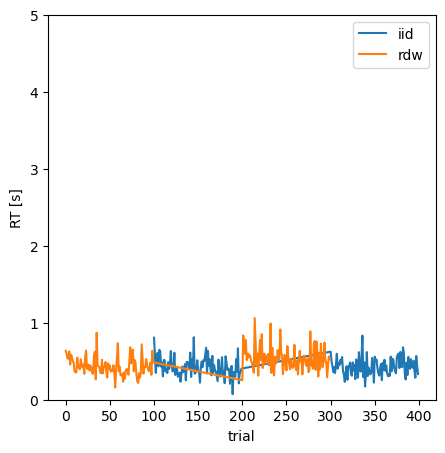

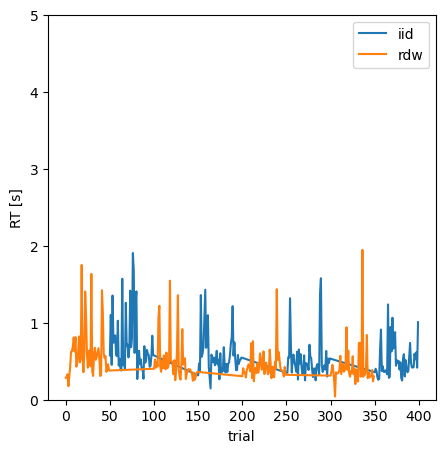

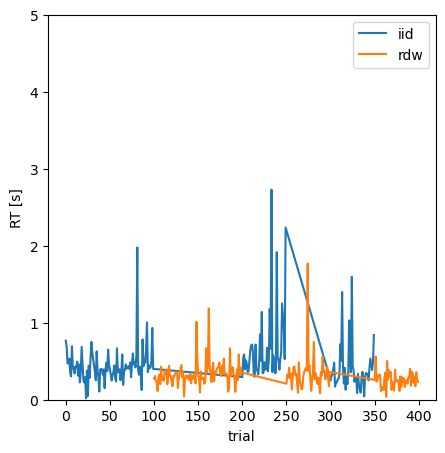

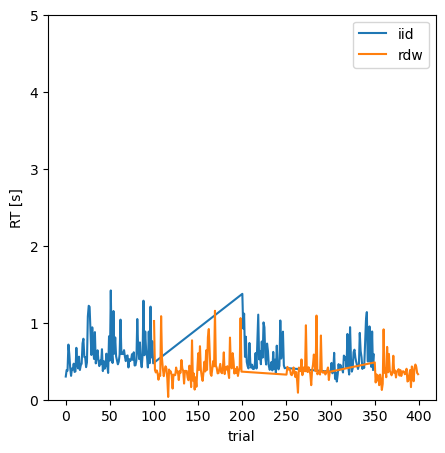

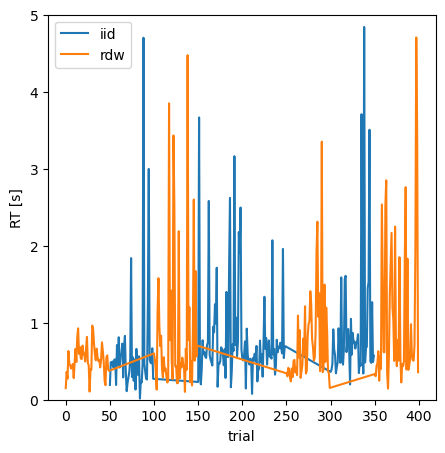

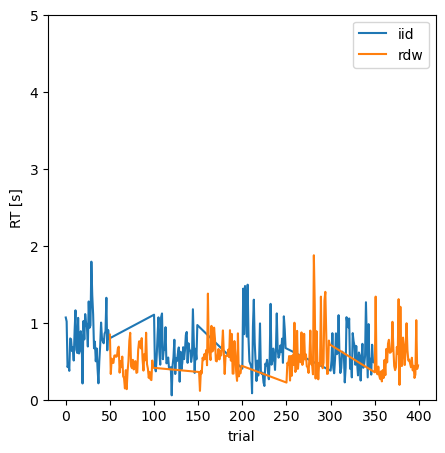

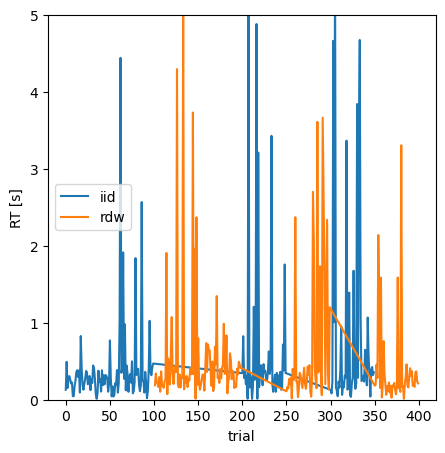

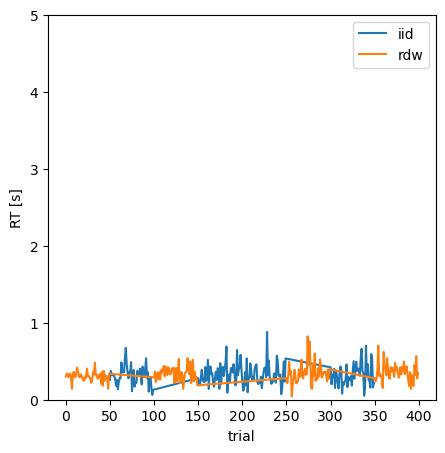

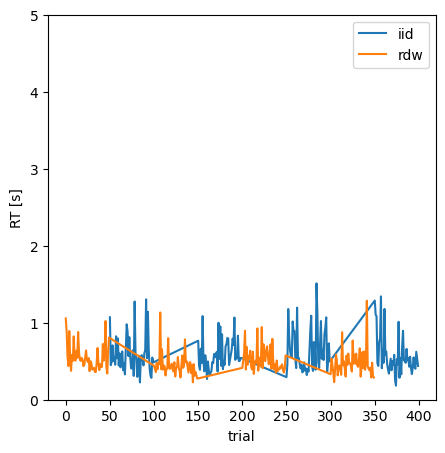

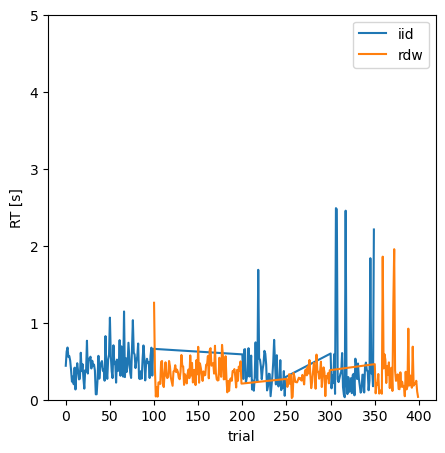

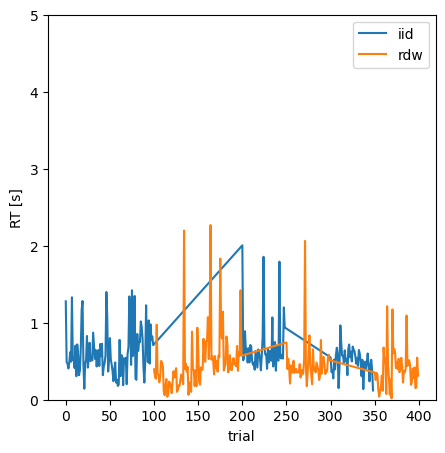

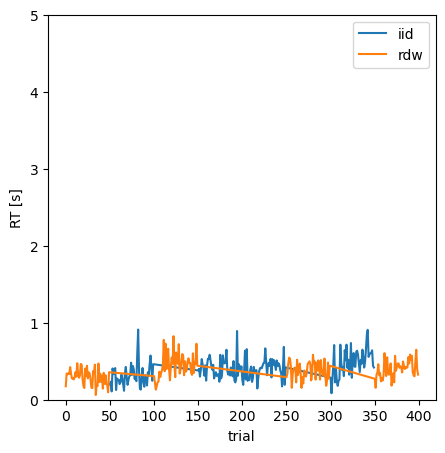

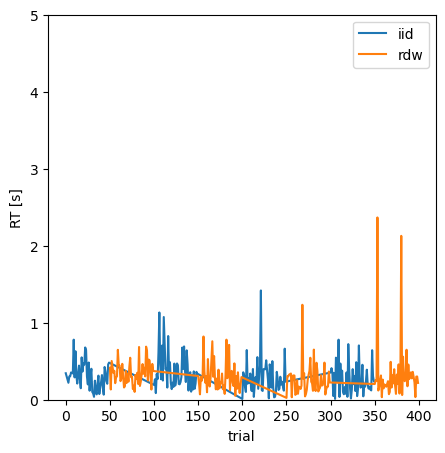

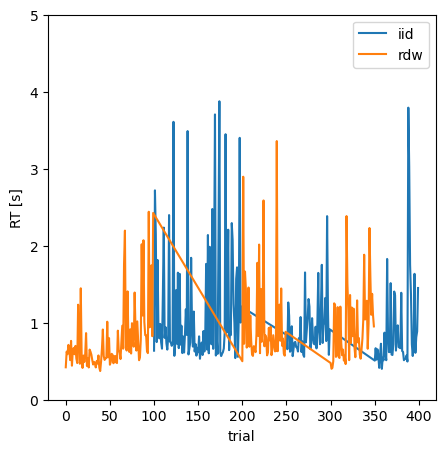

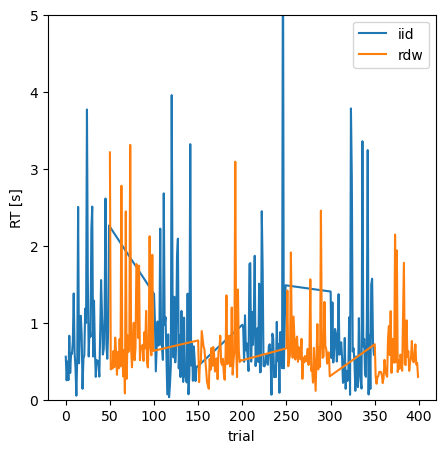

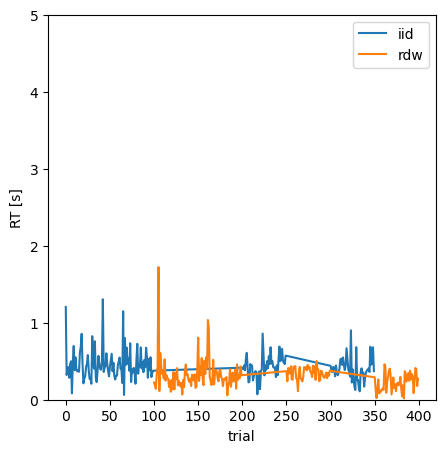

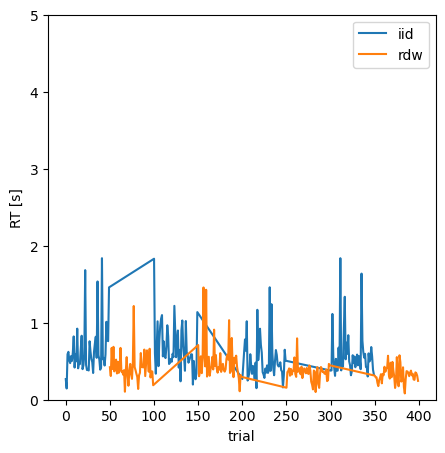

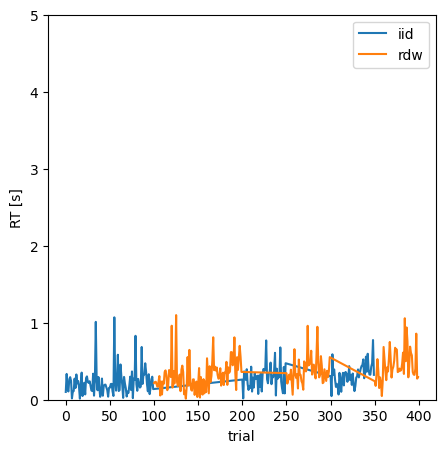

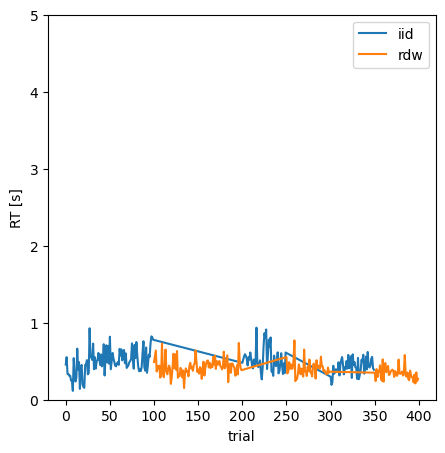

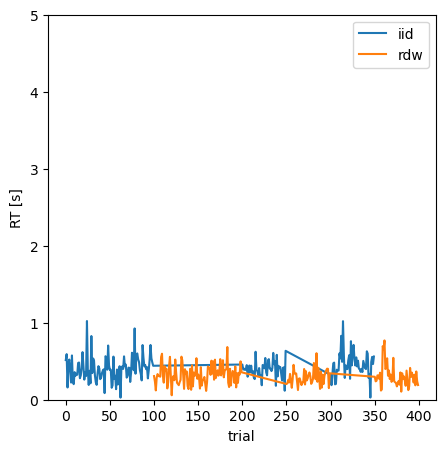

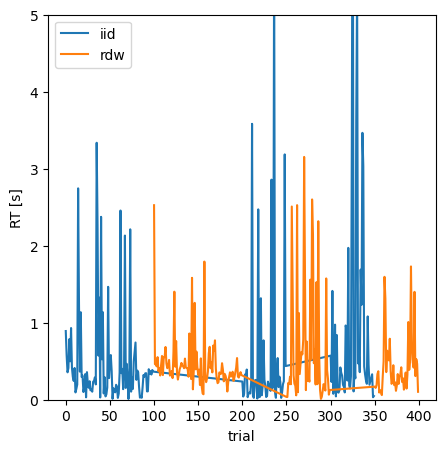

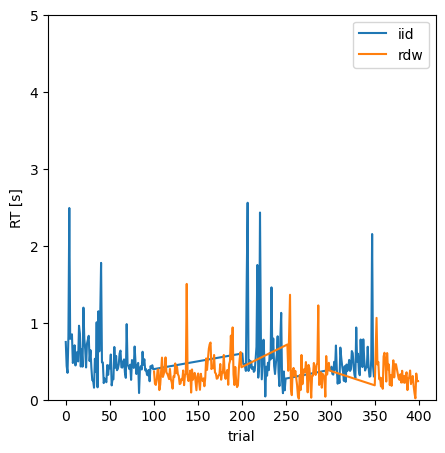

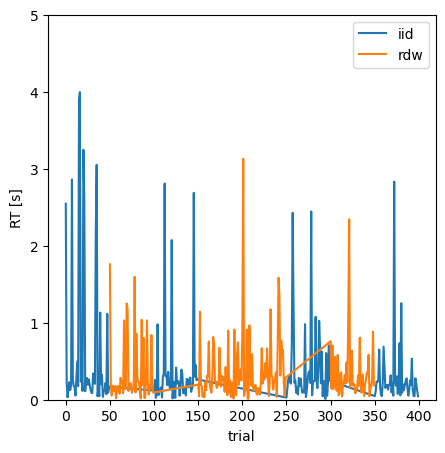

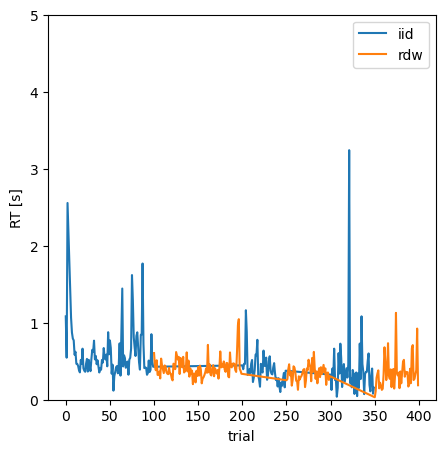

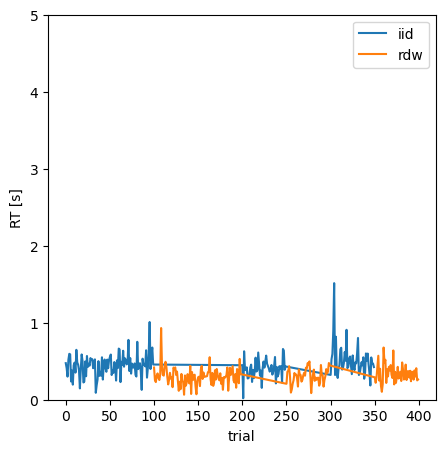

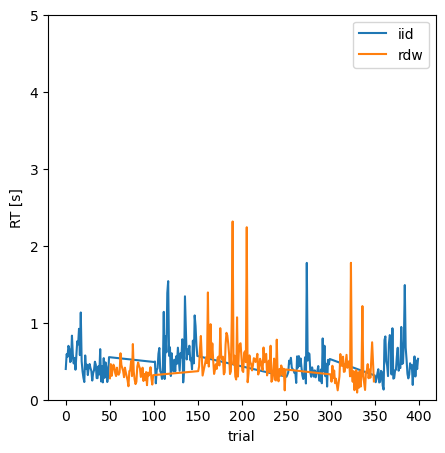

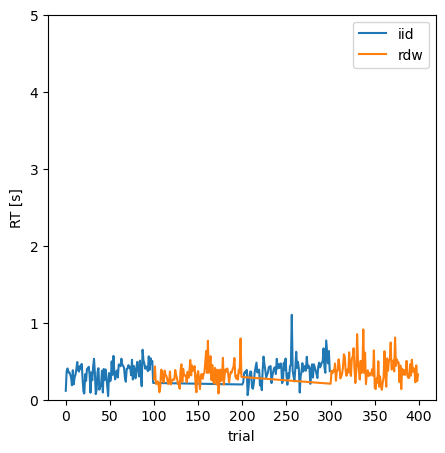

In [18]:
for elem in data_clean_list:
    fig =plt.figure(figsize=(5, 5))
    elem.groupby("path")['RT_s'].plot(legend = True)
    plt.xlabel('trial')
    plt.ylabel('RT [s]')
    plt.ylim(0,5)

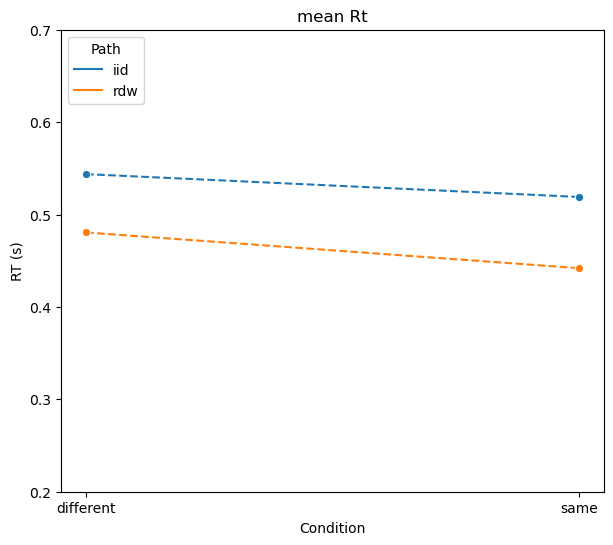

In [25]:
import seaborn as sns

all_data =  pd.concat(data_clean_list, ignore_index=True)
mean_rt_all = all_data.groupby(["path", "condition"])['RT_s'].mean().reset_index()

plt.figure(figsize=(7, 6))

sns.lineplot(x='condition', y='RT_s', hue='path', data=mean_rt_all, marker='o', linestyle='--')

plt.title('mean Rt')
plt.xlabel('Condition')
plt.ylabel('RT (s)')
plt.legend(title='Path', loc='upper left')
plt.ylim(0.2,0.7)
plt.show()

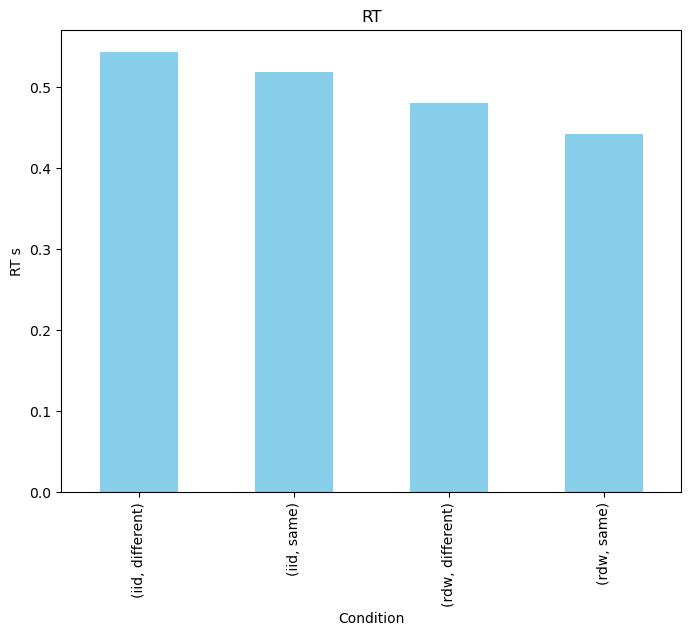

In [26]:
all_data = pd.concat(data_clean_list, ignore_index=True)


#mean_rt_all = all_data.groupby("cond_sum")['RT_s'].mean()
mean_rt_all = all_data.groupby(["path","condition"])['RT_s'].mean()


mean_rt_all.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('RT')
plt.xlabel('Condition')
plt.ylabel('RT s')
plt.show()

In [27]:
mean_rt = []
sd_rt = []
for elem in data_clean_list:
    mean_rt.append(elem.groupby("cond_sum")['RT_s'].mean())
    sd_rt.append(elem.groupby("cond_sum")['RT_s'].std())
mean_df_clean = pd.concat([pd.DataFrame(mean_rt,index = np.array(range(len(mean_rt)))), pd.DataFrame(sd_rt,index = np.array(range(len(mean_rt))))], axis=1)
mean_df_clean.set_axis(["iid_mean", "rdw_mean", "iid_std",'rdw_sdt'],axis=1)

ValueError: Length mismatch: Expected axis has 8 elements, new values have 4 elements

In [36]:
mean_df_clean.describe()

path,iid,rdw,iid,rdw
count,28.000000,28.000000,28.000000,28.000000
mean,0.553692,0.480506,0.499036,0.439552
std,0.172763,0.160889,0.283905,0.327531
min,0.289730,0.319225,0.119909,0.105000
25%,0.457518,0.377715,0.324649,0.189036
50%,0.538200,0.410208,0.453826,0.328120
75%,0.617251,0.562912,0.659386,0.601499
max,1.098860,1.010875,1.138239,1.246776


## Save

In [28]:
# save
import os
for i in range(len(data_clean_list)):
    os.chdir("C:/Users/Oleg/Desktop/Paris_Saclay/These/4_DATA/data_exp_1/data_clean_v10_std_nan")
    data_clean_list[i].to_csv(f'subj_{i}.csv', index= False, sep ='\t')

In [29]:
colums =data_clean_list[-1].columns.values.tolist()
np_ = np.empty((0,len(colums)))
for elem in data_clean_list:
    #read new_csv -> new_list_
    new_np = elem.to_numpy()
    np_ = np.concatenate([np_, elem.to_numpy()], axis=0)
all_subj_df = pd.DataFrame(np_)
all_subj_df =all_subj_df.set_axis(colums,axis=1)
#all_subj_df.to_csv('all_subject_exp_1.csv', index= False, sep ='\t')

In [30]:
all_subj_df.to_csv('all_subject_exp_1.csv', index= False, sep ='\t')

In [40]:
#all_subj_df.to_csv('all_subject_exp_1.csv', index= False, sep ='\t')

In [36]:
all_subj_df['RT_s'].isna().sum()

76

In [37]:
colums =data_clean_list[-1].columns.values.tolist()
np_rdw = np.empty((0,len(colums)))
np_iid = np.empty((0,len(colums)))
for elem in data_clean_list:
    iid =elem.sort_values('path',ignore_index = True, ascending= True)[0:200].to_numpy()
    rdw =elem.sort_values('path',ignore_index = True, ascending= True)[200:].to_numpy()
    #new_np = elem.to_numpy()
    np_iid = np.concatenate([np_iid, iid], axis=0)
    np_rdw = np.concatenate([np_rdw, rdw], axis=0)
    
all_subj_iid = pd.DataFrame(np_iid)
all_subj_rdw = pd.DataFrame(np_rdw)

all_subj_iid.set_axis(colums,axis=1)
all_subj_rdw.set_axis(colums,axis=1)
all_subj_iid.to_csv('all_subject_iid.csv', index= False, sep ='\t')
all_subj_rdw.to_csv('all_subject_rdw.csv', index= False, sep ='\t')

In [38]:
for i in range(len(data_clean_list)):
    iid =data_clean_list[i].sort_values('path',ignore_index = True, ascending= True)[0:200]
    rdw =data_clean_list[i].sort_values('path',ignore_index = True, ascending= True)[200:]
    
    iid_diff = iid.sort_values('condition',ignore_index = True, ascending= True)[0:100].to_csv(f'iid_diff_s_{i}.csv', index= False, sep ='\t')
    iid_same = iid.sort_values('condition',ignore_index = True, ascending= True)[100:].to_csv(f'iid_same_s_{i}.csv', index= False, sep ='\t')

    rdw_diff = rdw.sort_values('condition',ignore_index = True, ascending= True)[0:100].to_csv(f'rdw_diff_s_{i}.csv', index= False, sep ='\t')
    rdw_same = rdw.sort_values('condition',ignore_index = True, ascending= True)[100:].to_csv(f'rdw_same_s_{i}.csv', index= False, sep ='\t')
    

In [39]:
for i in range(len(data_clean_list)):
    iid =data_clean_list[i].sort_values('path',ignore_index = True, ascending= True)[0:200]
    rdw =data_clean_list[i].sort_values('path',ignore_index = True, ascending= True)[200:]
    iid =data_clean_list[i].sort_values('path',ignore_index = True, ascending= True)[0:200].to_csv(f'iid_subj_{i}.csv', index= False, sep ='\t')
    rdw =data_clean_list[i].sort_values('path',ignore_index = True, ascending= True)[200:].to_csv(f'rdw_subj_{i}.csv', index= False, sep ='\t')

### Moyenne de proportion

In [ ]:
mean_prop_tot = []
mean_prop_mean_side = []
mean_prop_lv_side= []
for elem in data_clean_list:
    mean_prop_tot.append(elem.groupby(['path', 'conditions',])['prop_left'].mean())
    mean_prop_mean_side.append(elem.groupby(['path', 'mean_side'])['prop_left'].mean())
    mean_prop_lv_side.append(elem.groupby(['path', 'last_visibl_side'])['prop_left'].mean())
mean_prop_tot_df = pd.DataFrame(mean_prop_tot,index = np.array(range(len(mean_prop_tot))))
mean_prop_mean_side_df = pd.DataFrame(mean_prop_mean_side,index = np.array(range(len(mean_prop_mean_side))))
mean_prop_lv_side_df= pd.DataFrame(mean_prop_lv_side,index = np.array(range(len(mean_prop_lv_side))))

In [ ]:
mean_prop_tot_df

In [ ]:
mean_prop_lv_side_df

In [ ]:
mean_prop_tot_df.describe().drop(index=['25%','50%','75%']).round(3)

In [ ]:
corelation = []
for elem in data_clean_list: 
    df  = elem
    #df = elem.sort_values('path',ignore_index = True, ascending= False)
    df[['mean_val','last_visibl_center_dist[deg]']] = df[['mean_val','last_visibl_center_dist[deg]']].abs()
    corelation.append(df.groupby("path")[['sd','RT_s','mean_val','last_visibl_center_dist[deg]']].corr().round(5)) 

cor_df = pd.concat([pd.DataFrame(corelation[0]['RT_s']), pd.DataFrame(corelation[1]['RT_s']),pd.DataFrame(corelation[2]['RT_s']),pd.DataFrame(corelation[3]['RT_s']),
                    pd.DataFrame(corelation[4]['RT_s']),pd.DataFrame(corelation[5]['RT_s']),pd.DataFrame(corelation[6]['RT_s']),
                   pd.DataFrame(corelation[7]['RT_s']),pd.DataFrame(corelation[8]['RT_s'])], axis=1)
cor_df.set_axis((range(0,9)),axis=1,inplace=True)